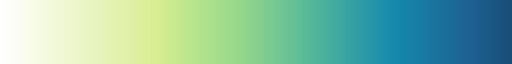

In [48]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
import matplotlib
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter
import os
import scipy.integrate as integrate

import networkx as nx

import sys
sys.path.append("../modules/")
import model as mod

import pickle

def white_to_color(color, name = "cmap"):
    colors = ["w", color]
    nodes = np.linspace(0, 1, len(colors))
    return LinearSegmentedColormap.from_list("name", list(zip(nodes, colors)))

def add_transparency_to_colormap(original_cmap, minval=0.0, maxval=1.0, n=100):
    # Get the colors from the original colormap
    colors = original_cmap(np.linspace(minval, maxval, n))
    
    # Add an alpha channel based on the y values
    colors[:, 3] = np.linspace(0, 1, n)
    
    # Create the new colormap
    new_cmap = mcolors.LinearSegmentedColormap.from_list("transparent", colors)
    
    return new_cmap

colors = ['#0077b6', '#40916c', '#a4161a', '#fcb75d', '#3d0066']
cmaps = [white_to_color(c) for c in colors]

colors_PD = ["w", "#F6FBE4", "#ECF6C9", "#E3F2AE", "#d9ed92", "#b5e48c", "#99d98c",
          "#76c893", "#52b69a", "#34a0a4", "#168aad", "#1a759f", "#1e6091", "#184e77"]
nodes = np.linspace(0, 1, len(colors_PD))
cmap_PD = LinearSegmentedColormap.from_list("cmap_SR", list(zip(nodes, colors_PD)))

# General

In [4]:
N = 100000
Nreplicas = 100
S = 20
max_vsq = 31

th = 1e-6

path = "../data/general_data_plots/"

R_array = np.load(path + "R_array_N" + str(N) + "_S" + str(S) + ".npy")
vsq_array = np.load(path + "vsq_array_N" + str(N) + "_S" + str(S) + ".npy")
Delta_array = np.load(path + "Delta_array_N" + str(N) + "_S" + str(S) + ".npy")

In [5]:
idx_replica = 0

coex = np.load(path + "coex_general_N" + str(N) + "_S" + str(S) + "_replica" + str(idx_replica) + ".npy")
npatch_dom = np.load(path + "npatch_dom_general_N" + str(N) + "_S" + str(S) + "_replica" + str(idx_replica) + ".npy")
part_rate_loc = np.load(path + "part_rate_loc_general_N" + str(N) + "_S" + str(S) + "_replica" + str(idx_replica) + ".npy")
spread_loc = np.load(path + "spread_loc_general_N" + str(N) + "_S" + str(S) + "_replica" + str(idx_replica) + ".npy")

In [6]:
mask = np.zeros((len(R_array), len(vsq_array)))
for i in range(len(R_array)):
    mask[i, :] = R_array[i] > 1

In [7]:
coex_avg = np.zeros((len(R_array), len(vsq_array)))

for i in range(25):
    coex = np.load(path + "coex_general_N" + str(N) + "_S" + str(S) + "_replica" + str(i) + ".npy")
    coex_avg += coex
coex_avg /= 25

In [8]:
locdata_R_slice_with_th_N5 = np.loadtxt("../data/localization_general/plot_R_slice_general__N-100000_S-20_da-2.5_seed-42_vsq-20.00.dat")
locdata_v_slice_with_th_N5 = np.loadtxt("../data/localization_general/plot_v_slice_general__N-100000_S-20_da-2.5_seed-42_R-2.5.dat")
locdata_R_slice_with_th_N6 = np.loadtxt("../data/localization_general/plot_R_slice_general__N-1000000_S-20_da-2.5_seed-42_vsq-20.00.dat")
locdata_v_slice_with_th_N6 = np.loadtxt("../data/localization_general/plot_v_slice_general__N-1000000_S-20_da-2.5_seed-42_R-2.5.dat")
locdata_R_slice_with_th_N7 = np.loadtxt("../data/localization_general/plot_R_slice_general__N-10000000_S-20_da-2.5_seed-42_vsq-20.00.dat")
locdata_v_slice_with_th_N7 = np.loadtxt("../data/localization_general/plot_v_slice_general__N-10000000_S-20_da-2.5_seed-42_R-2.5.dat")

/var/folders/rp/4969vws91431vgg3v1nxd3bw0000gp/T/ipykernel_89172/656855899.py:10: RuntimeWarning: divide by zero encountered in divide
  yy *= xx**2/(xx - 1)


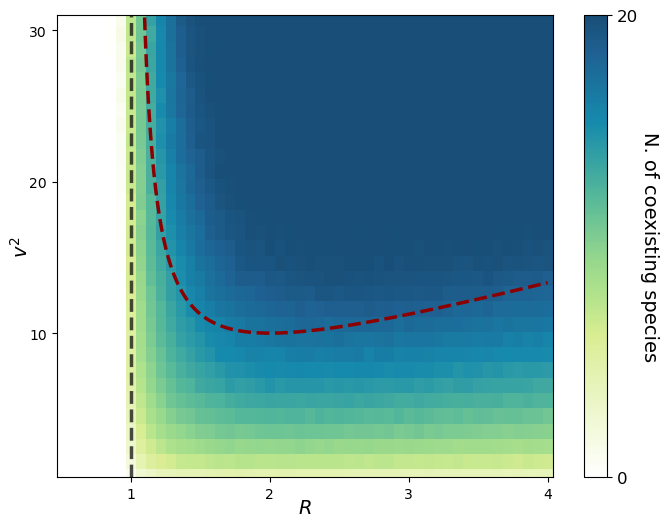

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

im = ax.pcolormesh(R_array, vsq_array, coex_avg.T, cmap= cmap_PD, shading='auto')
ax.set_xlabel('$R$', labelpad = -2, fontsize = 14)
ax.set_ylabel('$v^2$', labelpad = -2, fontsize = 14)
# ax.set_title(f'$S = {S}, N = {N}$, averaged over replicas', fontsize = 15)

xx = np.linspace(1, R_array.max(), 1000)
yy = np.mean(Delta_array) - np.min(Delta_array)
yy *= xx**2/(xx - 1)


ax.plot(xx, yy, color='darkred', lw = 2.5, ls = '--')

ax.set_xticks(np.round(np.linspace(1, 4, 4), 1))
ax.set_yticks(np.round(np.arange(0, vsq_array.max(), 10), ))
ax.axvline(x = 1, color = 'black', lw = 2.5, ls = '--', alpha = 0.7)
ax.set_ylim(vsq_array.min(), max_vsq)
# colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('N. of coexisting species', rotation=270, labelpad=15, fontsize = 14)
cbar.set_ticks(np.linspace(0, S, 2).astype(int))
cbar.ax.tick_params(labelsize=12)
plt.show()

In [10]:
part_rate_avg = np.zeros((len(R_array), len(vsq_array), S))

counter = np.zeros((len(R_array), len(vsq_array), S))

for i in range(25):
    temp = np.load(path + "part_rate_loc_general_N" + str(N) + "_S" + str(S) + "_replica" + str(i) + ".npy")
    temp[np.isnan(temp)] = 0
    part_rate_avg += temp
    counter += 1 - np.isnan(temp)
part_rate_avg /= counter

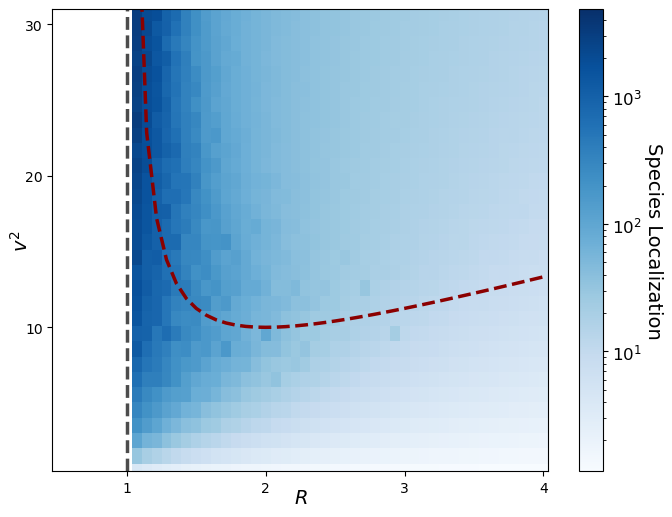

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

mat = np.nanmean(part_rate_avg, axis = -1)*mask

im = ax.pcolormesh(R_array, vsq_array, mat.T, cmap= "Blues", shading='auto', norm=matplotlib.colors.LogNorm())
ax.set_xlabel('$R$', labelpad = -5, fontsize = 14)
ax.set_ylabel('$v^2$', labelpad = -5, fontsize = 14)
# ax.set_title(f'$S = {S}, N = {N}$, averaged over replicas and species', fontsize = 15)

xx = R_array[R_array > 1]
yy = np.mean(Delta_array) - np.min(Delta_array)
yy *= xx**2/(xx - 1)

ax.plot(xx, yy, color='darkred', lw = 2.5, ls = '--')
ax.set_xticks(np.round(np.linspace(1, 4, 4), 1))
ax.set_yticks(np.round(np.arange(0, vsq_array.max(), 10), ))
ax.axvline(x = 1, color = 'black', lw = 2.5, ls = '--', alpha = 0.7)
ax.set_ylim(vsq_array.min(), max_vsq)

# colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Species Localization', rotation=270, labelpad=15, fontsize = 14)
cbar.ax.tick_params(labelsize=12)
plt.show()

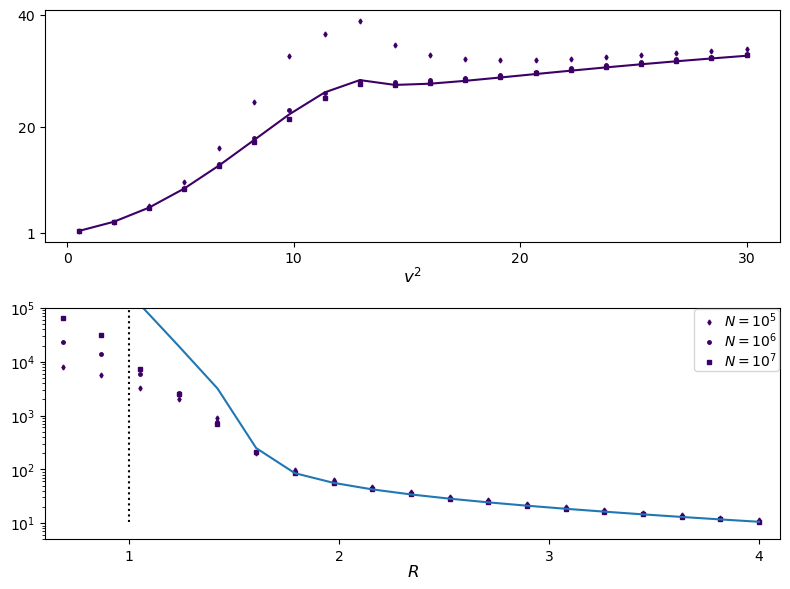

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8,6))

ax[0].set_xlabel('$v^2$', labelpad = 0, fontsize = 12)
ax[1].set_xlabel('$R$', labelpad = 0, fontsize = 12)
# ax[1].set_ylabel('Avg. Species Localization',  fontsize = 15)
# fig.text(-0.01, 0.5, 'Species Localization', va='center', rotation='vertical', fontsize=15)

# ax.set_title(f'$S = {S}, N = {N}$, averaged over replicas and species', fontsize = 15)
ax[0].plot(locdata_v_slice_with_th_N5[0], locdata_v_slice_with_th_N5[1], "d", ms=2.5, label="$N=10^5$", color=colors[-1])
ax[0].plot(locdata_v_slice_with_th_N6[0], locdata_v_slice_with_th_N6[1], "o", ms=2.5, label="$N=10^6$", color=colors[-1])
ax[0].plot(locdata_v_slice_with_th_N7[0], locdata_v_slice_with_th_N7[1], "s", ms=2.5, label="$N=10^7$", color=colors[-1])
ax[0].plot(locdata_v_slice_with_th_N5[0], locdata_v_slice_with_th_N5[2], "-", color=colors[-1])
ax[0].set_yticks(np.round(np.linspace(1, 40, 3)))
ax[0].set_xticks(np.arange(0, max_vsq, 10))

ax[1].plot(locdata_R_slice_with_th_N5[0], locdata_R_slice_with_th_N5[1], "d", ms=2.5,  color=colors[-1],label="$N=10^5$",)
ax[1].plot(locdata_R_slice_with_th_N5[0], locdata_R_slice_with_th_N6[1], "o", ms=2.5,color=colors[-1],label="$N=10^6$",)
ax[1].plot(locdata_R_slice_with_th_N5[0], locdata_R_slice_with_th_N7[1], "s", ms=2.5,color=colors[-1],label="$N=10^7$",)
ax[1].plot(locdata_R_slice_with_th_N5[0], locdata_R_slice_with_th_N5[2], "-",colors[0])
ax[1].plot([1, 1], [locdata_R_slice_with_th_N5[2].min(), locdata_R_slice_with_th_N5[2].max()], ":", color="k")
ax[1].set_xticks(np.round(np.linspace(locdata_R_slice_with_th_N5[0,0], locdata_R_slice_with_th_N5[0,-1], 5)))
ax[1].set_yscale("log")
ax[1].set_xlim(0.6, 4.1)
ax[1].set_ylim(5, 1e5)
ax[1].legend(loc="best", fontsize=10, borderpad=0.1, labelspacing=0.1, columnspacing=0.5, borderaxespad=0.1,handletextpad=0.1)



fig.tight_layout()
plt.show()

# Heterogenous networks

In [16]:
def multi_run_filtering(data,xaxis,yaxis,sigma,threshold):
    filtered_data = gaussian_filter(data, sigma=sigma, mode='nearest')
    boundary = np.zeros(xaxis.size)
    for i in range(xaxis.size):
        if(xaxis[i] <= 1):
            rough_boundary = np.where((filtered_data[i] > threshold) & (filtered_data[i] < threshold * 1.5))[0]
            if(len(rough_boundary) > 0):
                boundary[i] = np.mean(yaxis[rough_boundary])
            else:
                boundary[i] = np.nan
        else:
            boundary[i] = 0

    if(np.isnan(boundary).any()):
        nonNanLocs = np.where(~np.isnan(boundary))[0]
        lessThanOne = np.where(xaxis[nonNanLocs] < 1)[0]
        boundary[nonNanLocs][lessThanOne] = gaussian_filter(boundary[nonNanLocs][lessThanOne], sigma=4.5, mode='nearest')
        return xaxis[nonNanLocs], boundary[nonNanLocs]   
    else:
        lessThanOne = np.where(xaxis < 1)[0]
        boundary[lessThanOne] = gaussian_filter(boundary[lessThanOne], sigma=4.5, mode='nearest')
        return xaxis, boundary

## Erdos-Renyi

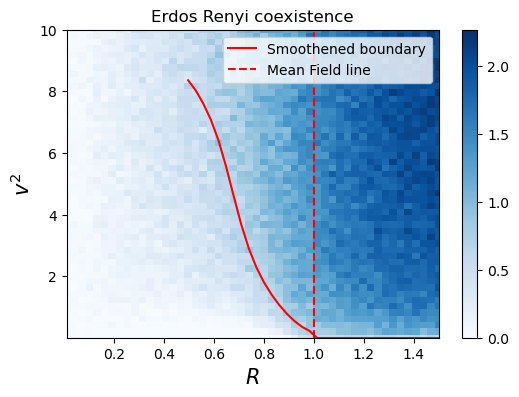

In [22]:
data_folder = "../data/beyondMF/ER_IID/ER_iid_parallel_T-100000/"
nreps = len(list(os.scandir(data_folder)))

er_datas= [] 
for i in range(1,26):
    er_data = np.load(data_folder+"rep_%d.npz"%i)
    er_datas.append(er_data)

er_coex_arrays,er_maxders,er_r_arrays,er_v2_arrays = [],[],[],[]

for er_data in er_datas:
    er_coex_array,er_maxder,er_r_array,er_v2_array = er_data['coex_array'],er_data['maxder'],er_data['R_array'],er_data['v2_array']
    er_coex_arrays.append(er_coex_array)
    er_maxders.append(er_maxder)
    er_r_arrays.append(er_r_array)
    er_v2_arrays.append(er_v2_array)
    
averaged_coex_er = np.zeros(er_coex_arrays[0].shape)
for er_coex_array in er_coex_arrays:
    averaged_coex_er += er_coex_array/nreps

# er_xaxis,er_smoothened_boundary = multi_run_filtering(averaged_coex_er,er_r_arrays[0],er_v2_arrays[0],sigma=1.5,threshold=0.55)
er_xaxis,er_smoothened_boundary = multi_run_filtering(averaged_coex_er,er_r_arrays[0],er_v2_arrays[0],sigma=1.5,threshold=0.5)
er_smoothened_boundary[np.where(er_xaxis < 1)[0]] = gaussian_filter(er_smoothened_boundary[np.where(er_xaxis < 1)[0]], sigma=1.5, mode='nearest')

plt.figure(figsize=(6,4))

plt.pcolormesh(er_r_arrays[0],er_v2_arrays[0],averaged_coex_er.T,cmap='Blues')
plt.plot(er_xaxis, er_smoothened_boundary, color='red',label="Smoothened boundary")
plt.axvline(1, color='red', linestyle='--',label="Mean Field line")
plt.ylim(er_v2_arrays[0][0], er_v2_arrays[0][-1])
plt.xlim(np.min(er_r_arrays[0]), np.max(er_r_arrays[0]))
plt.xlabel(r"$R$",fontsize=15)
plt.ylabel(r"$v^2$",fontsize=15)

plt.colorbar()

# plt.xscale('log',base=10)
# plt.yscale('log')


plt.title("Erdos Renyi coexistence")
plt.legend()
plt.show()

## Small world

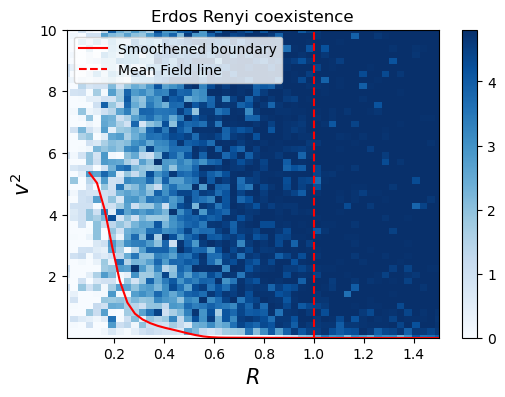

In [34]:
data_folder = "../data/beyondMF/SM_IID/SM_iid_parallel_T-100000/"
nreps = len(list(os.scandir(data_folder)))

sm_datas= [] 
for i in range(25):
    sm_data = np.load(data_folder+"rep_%d.npz"%i)
    sm_datas.append(sm_data)

sm_coex_arrays,sm_maxders,sm_r_arrays,sm_v2_arrays = [],[],[],[]

for sm_data in sm_datas:
    sm_coex_array,sm_maxder,sm_r_array,sm_v2_array = sm_data['coex_array'],sm_data['maxder'],sm_data['R_array'],sm_data['v2_array']
    sm_coex_arrays.append(sm_coex_array)
    sm_maxders.append(sm_maxder)
    sm_r_arrays.append(sm_r_array)
    sm_v2_arrays.append(sm_v2_array)
    

averaged_coex_sm = np.zeros(sm_coex_arrays[0].shape)
for sm_coex_array in sm_coex_arrays:
    averaged_coex_sm += sm_coex_array/nreps

# sm_xaxis,sm_smoothened_boundary = multi_run_filtering(averaged_coex_sm,sm_r_arrays[0],sm_v2_arrays[0],sigma=1.5,threshold=1.6)
sm_xaxis,sm_smoothened_boundary = multi_run_filtering(averaged_coex_sm,sm_r_arrays[0],sm_v2_arrays[0],sigma=3.5,threshold=1.)
sm_smoothened_boundary[np.where(sm_xaxis < 1)[0]] = gaussian_filter(sm_smoothened_boundary[np.where(sm_xaxis < 1)[0]], sigma=1.5, mode='nearest')

plt.figure(figsize=(6,4))



plt.pcolormesh(sm_r_arrays[0],sm_v2_arrays[0],averaged_coex_sm.T,cmap='Blues')
plt.plot(sm_xaxis, sm_smoothened_boundary, color='red',label="Smoothened boundary")
plt.axvline(1, color='red', linestyle='--',label="Mean Field line")
plt.ylim(sm_v2_arrays[0][0], sm_v2_arrays[0][-1])
plt.xlim(np.min(sm_r_arrays[0]), np.max(sm_r_arrays[0]))
plt.xlabel(r"$R$",fontsize=15)
plt.ylabel(r"$v^2$",fontsize=15)

plt.colorbar()

# plt.xscale('log',base=10)
# plt.yscale('log')


plt.title("Erdos Renyi coexistence")
plt.legend()
plt.show()

## Barabasi-Albert network

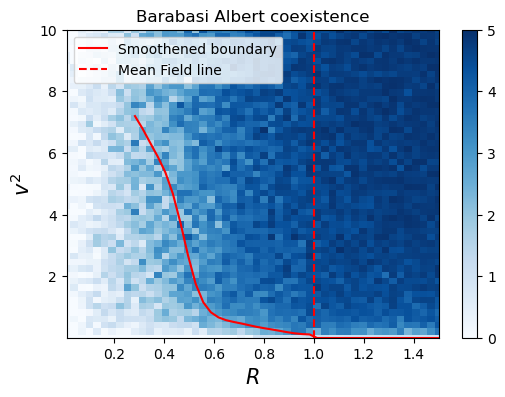

In [33]:
data_folder = "../data/beyondMF/BA_IID/BA_iid_parallel_T-100000/"
nreps = len(list(os.scandir(data_folder)))

ba_datas= [] 
for i in range(nreps):
    ba_data = np.load(data_folder+"rep_%d.npz"%i)
    ba_datas.append(ba_data)

ba_coex_arrays,ba_maxders,ba_r_arrays,ba_v2_arrays = [],[],[],[]

for ba_data in ba_datas:
    ba_coex_array,ba_maxder,ba_r_array,ba_v2_array = ba_data['coex_array'],ba_data['maxder'],ba_data['R_array'],ba_data['v2_array']
    ba_coex_arrays.append(ba_coex_array)
    ba_maxders.append(ba_maxder)
    ba_r_arrays.append(ba_r_array)
    ba_v2_arrays.append(ba_v2_array)
    
averaged_coex = np.zeros(ba_coex_arrays[0].shape)
for ba_coex_array in ba_coex_arrays:
    averaged_coex += ba_coex_array/nreps

ba_xaxis,ba_smoothened_boundary = multi_run_filtering(averaged_coex,ba_r_arrays[0],ba_v2_arrays[0],sigma=1.5,threshold=1.9)
ba_smoothened_boundary[np.where(ba_xaxis<1)[0]] = gaussian_filter(ba_smoothened_boundary[np.where(ba_xaxis<1)[0]], sigma=1.5, mode='nearest')

plt.figure(figsize=(6,4))

plt.pcolormesh(ba_r_arrays[0],ba_v2_arrays[0],averaged_coex.T,cmap='Blues')
plt.plot(ba_xaxis, ba_smoothened_boundary, color='red',label="Smoothened boundary")
plt.axvline(1, color='red', linestyle='--',label="Mean Field line")
plt.ylim(ba_v2_arrays[0][0], ba_v2_arrays[0][-1])
plt.xlim(np.min(ba_r_arrays[0]), np.max(ba_r_arrays[0]))
plt.xlabel(r"$R$",fontsize=15)
plt.ylabel(r"$v^2$",fontsize=15)

plt.colorbar()

# plt.xscale('log',base=10)
# plt.yscale('log')


plt.title("Barabasi Albert coexistence")
plt.legend()
plt.show()

## Single networks

In [46]:
S = 5
N = 100

cvec = np.ones((S,N))

farray = np.linspace(0.5,2,S)
xi = 1/N

x0_dyn = 0.5
var_dyn = 1.5
rho0 = np.ones((S,N))/S

np.random.seed(99)
rarray = np.random.lognormal(np.log(x0_dyn), np.sqrt(var_dyn), size = (S, N))

print(x0_dyn*np.exp(var_dyn/2), x0_dyn**2*np.exp(2*var_dyn) - x0_dyn*np.exp(var_dyn/2))

1.0585000083063374 3.9628842224905796


#### Mean Field

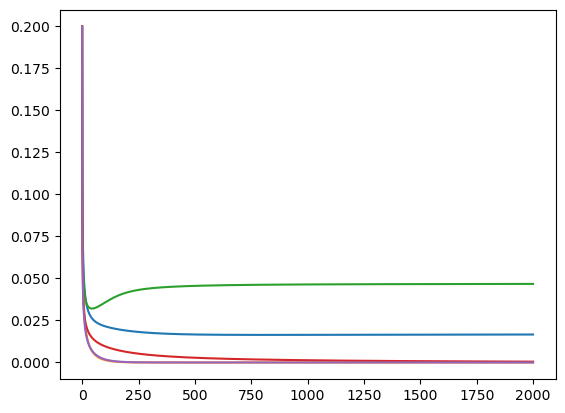

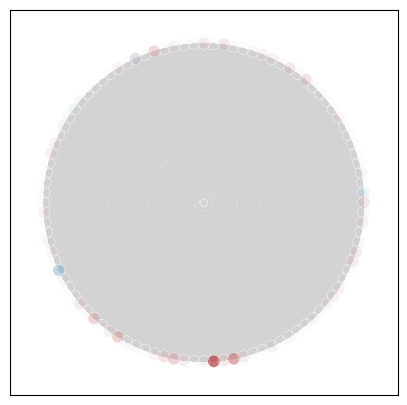

In [58]:
mf_network = nx.complete_graph(N)

kernels = np.zeros((S, N, N), dtype = np.float64)

for i in range(S):
    f = farray[i]    
    mf_kernel = mod.find_effective_kernel(f, xi, mf_network)
    kernels[i,:,:] = mf_kernel

earray = np.zeros((S, N), dtype = np.float64)

for k in range(S):
    earray[k,:] = np.mean(kernels[k,:,:]) * N / rarray[k,:]

tmax = 2000

rho_soln_MF = integrate.solve_ivp(mod.rhodot_function_solveivp, [0, tmax], rho0.flatten(), args = (kernels, cvec, earray,S,N), method = 'RK45')
rho_MF = rho_soln_MF.y.reshape((S,N,int(rho_soln_MF.t.size)))
rhostat_MF = rho_MF[:, :, -1]

plt.plot(rho_soln_MF.t, np.mean(rho_MF, axis = 1).T)
plt.show()

pos = nx.circular_layout(mf_network)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for alpha in range(S):
    nx.draw_networkx_edges(mf_network, pos = pos, width = 0.1, edge_color = 'lightgray', ax = ax, alpha = 0.1)
    nx.draw_networkx_nodes(mf_network, pos = pos,  node_color = rhostat_MF[alpha], ax = ax,
                            cmap = add_transparency_to_colormap(cmaps[alpha], minval = 0.3, maxval = 1), vmin = 0,
                            vmax = 0.5,
                            edgecolors='w', linewidths=0.08,
                            node_size = 75)
plt.show()


#### Erdos Renyi

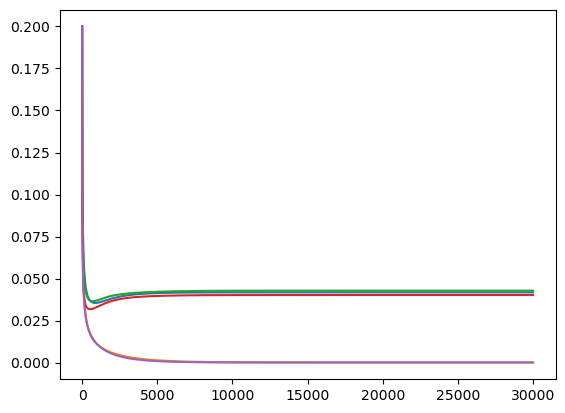

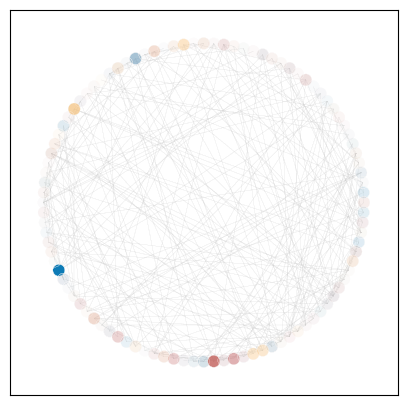

(np.float64(17.68358117718915), array([0.04177852, 0.04280176, 0.04019757]))

In [57]:
p = 5/N

er_network = nx.erdos_renyi_graph(N, p, seed = 707399)
while(nx.is_connected(er_network) == False):
    seed = np.random.randint(0, 100000)
    er_network = nx.erdos_renyi_graph(N, p, seed = seed)

kernels = np.zeros((S, N, N), dtype = np.float64)

for i in range(S):
    f = farray[i]    
    er_kernel = mod.find_effective_kernel(f, xi, er_network)
    kernels[i,:,:] = er_kernel

earray = np.zeros((S, N), dtype = np.float64)

for k in range(S):
    earray[k,:] = np.mean(kernels[k,:,:]) * N / rarray[k,:]

    ediag = np.linalg.inv(np.diag(earray[k,:]))

earray = np.zeros((S, N), dtype = np.float64)

for k in range(S):
    earray[k,:] = np.mean(kernels[k,:,:]) * N / rarray[k,:]

tmax = 30000

rho_soln_ER = integrate.solve_ivp(mod.rhodot_function_solveivp, [0, tmax], rho0.flatten(), args = (kernels, cvec, earray,S,N), method = 'RK45')
rho_ER = rho_soln_ER.y.reshape((S,N,int(rho_soln_ER.t.size)))
rhostat_ER = rho_ER[:, :, -1]

plt.plot(rho_soln_ER.t, np.mean(rho_ER, axis = 1).T)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for alpha in range(S):
    nx.draw_networkx_edges(er_network, pos = pos, width = 0.1, edge_color = 'lightgray', ax = ax, alpha = 0.3)
    nx.draw_networkx_nodes(er_network, pos = pos,  node_color = rhostat_ER[alpha], ax = ax,
                            cmap = add_transparency_to_colormap(cmaps[alpha], minval = 0.3, maxval = 1), vmin = 0,
                            edgecolors='w', linewidths=0.08,
                            vmax = 0.5,
                            node_size = 75)
plt.show()

rhostat_ER_mean = rhostat_ER.mean(axis = 1)
th_ext = 1e-2
idx_surv_ER = np.where(rhostat_ER_mean > th_ext)[0]

rhostat_surv_ER = rhostat_ER[idx_surv_ER]

idx_max_ER = np.argmax(rhostat_surv_ER.mean(axis = 1))
loc_ER = np.mean(rhostat_surv_ER**4, axis = 1)/np.mean(rhostat_surv_ER**2, axis = 1)**2
loc_ER.mean(), rhostat_surv_ER.mean(axis = 1)

#### Small World

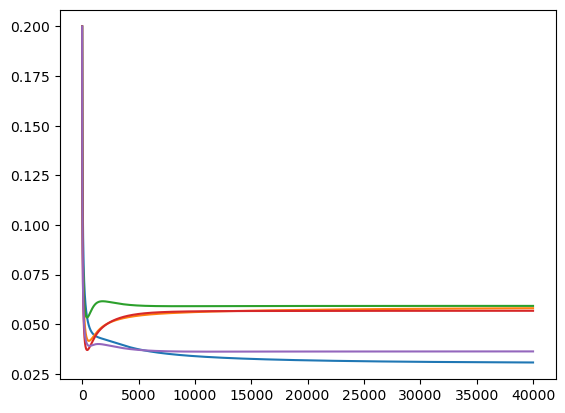

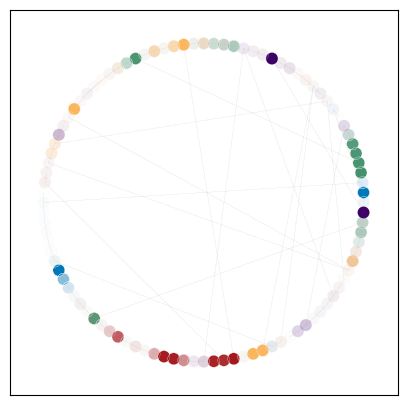

(np.float64(22.338638085055297),
 array([0.03066876, 0.05802055, 0.05917956, 0.0567214 , 0.03624317]))

In [59]:
p = 0.2
nn = 2

sm_network = nx.watts_strogatz_graph(N,nn,p, seed = 39)
if(nx.is_connected(sm_network) == False):
    print("Not connected")
    
kernels = np.zeros((S, N, N), dtype = np.float64)

for i in range(S):
    f = farray[i]    
    sm_kernel = mod.find_effective_kernel(f, xi, sm_network)
    kernels[i,:,:] = sm_kernel

earray = np.zeros((S, N), dtype = np.float64)

for k in range(S):
    earray[k,:] = np.mean(kernels[k,:,:]) * N / rarray[k,:]

tmax = 40000

rho_soln_SM = integrate.solve_ivp(mod.rhodot_function_solveivp, [0, tmax], rho0.flatten(), args = (kernels, cvec, earray,S,N), method = 'RK45')
rho_SM = rho_soln_SM.y.reshape((S,N,int(rho_soln_SM.t.size)))
rhostat_SM = rho_SM[:, :, -1]

plt.plot(rho_soln_SM.t, np.mean(rho_SM, axis = 1).T)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for alpha in range(S):
    nx.draw_networkx_edges(sm_network, pos = pos, width = 0.1, edge_color = 'lightgray', ax = ax, alpha = 0.3)
    nx.draw_networkx_nodes(sm_network, pos = pos,  node_color = rhostat_SM[alpha], ax = ax,
                            cmap = add_transparency_to_colormap(cmaps[alpha], minval = 0.3, maxval = 1), vmin = 0,
                            vmax = 0.5,
                            edgecolors='w', linewidths=0.08,
                            node_size = 75)
plt.show()

rhostat_SM_mean = rhostat_SM.mean(axis = 1)
th_ext = 1e-2
idx_surv_SM = np.where(rhostat_SM_mean > th_ext)[0]

rhostat_surv_SM = rhostat_SM[idx_surv_SM]

idx_max_SM = np.argmax(rhostat_surv_SM.mean(axis = 1))
loc_SM = np.mean(rhostat_surv_SM**4, axis = 1)/np.mean(rhostat_surv_SM**2, axis = 1)**2
loc_SM.mean(), rhostat_surv_SM.mean(axis = 1)

#### Barabasi Albert

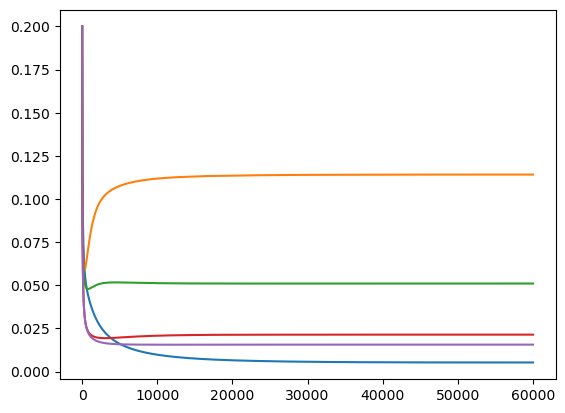

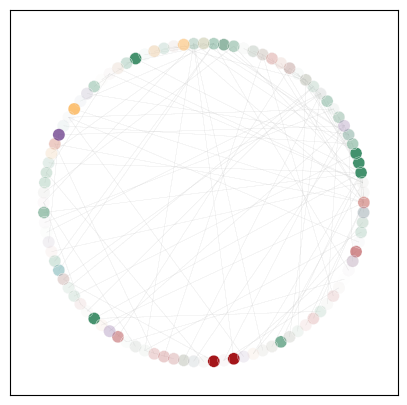

In [61]:
ba_network = nx.barabasi_albert_graph(N, 1, seed = 21)
if nx.is_connected(ba_network) == False:
    print("not connected")

kernels = np.zeros((S, N, N), dtype = np.float64)

for i in range(S):
    f = farray[i]    
    ba_kernel = mod.find_effective_kernel(f, xi, ba_network)
    kernels[i,:,:] = ba_kernel

earray = np.zeros((S, N), dtype = np.float64)

for k in range(S):
    earray[k,:] = np.mean(kernels[k,:,:]) * N / rarray[k,:]

tmax = 60000

rho_soln_BA = integrate.solve_ivp(mod.rhodot_function_solveivp, [0, tmax], rho0.flatten(), args = (kernels, cvec, earray,S,N), method = 'RK45')
rho_BA = rho_soln_BA.y.reshape((S,N,int(rho_soln_BA.t.size)))
rhostat_BA = rho_BA[:, :, -1]

plt.plot(rho_soln_BA.t, np.mean(rho_BA, axis = 1).T)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for alpha in range(S):
    nx.draw_networkx_edges(ba_network, pos = pos, width = 0.1, edge_color = 'lightgray', ax = ax, alpha = 0.3)
    nx.draw_networkx_nodes(ba_network, pos = pos,  node_color = rhostat_BA[alpha], ax = ax,
                            cmap = add_transparency_to_colormap(cmaps[alpha], minval = 0.3, maxval = 1), vmin = 0,
                            edgecolors='w', linewidths=0.08,
                            vmax = 0.5,
                            node_size = 75)
plt.show()



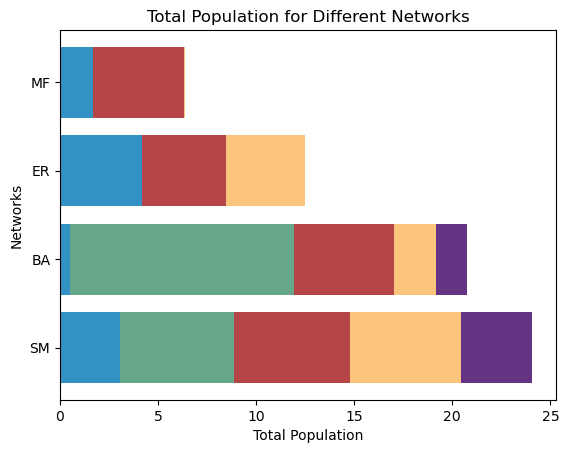

In [62]:
# Calculate the total population for each network
total_population = [rhostat_MF.sum(axis=-1), rhostat_ER.sum(axis=-1), rhostat_BA.sum(axis=-1), rhostat_SM.sum(axis=-1)][::-1]
total_population = np.array(total_population)

# Define the network labels
network_labels = ['MF', 'ER', 'BA', 'SM'][::-1]

# Create a stacked horizontal bar plot
for alpha in range(5):
    plt.barh(network_labels, total_population[:, alpha], left=total_population[:, :alpha].sum(axis=1),
             color=colors[alpha], alpha=0.8)

# Add labels and title
plt.ylabel('Networks')
plt.xlabel('Total Population')
plt.title('Total Population for Different Networks')


# Show the plot
plt.show()


# Localization lines

In [36]:
DeltaMax_BA, pcoex_BA_D = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_deltamax__BA__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
DeltaMax_ER02, pcoex_ER02_D = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_deltamax__ER02__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
DeltaMax_ER05, pcoex_ER05_D = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_deltamax__ER05__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
DeltaMax_SW, pcoex_SW_D = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_deltamax__SW__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
DeltaMax_MF, pcoex_MF_D = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_deltamax__MF__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")

In [37]:
vsq_BA, pcoex_BA_vsq = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_vsq__BA__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
vsq_ER02, pcoex_ER02_vsq = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_vsq__ER02__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
vsq_ER05, pcoex_ER05_vsq = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_vsq__ER05__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
vsq_SW, pcoex_SW_vsq = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_vsq__SW__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")
vsq_MF, pcoex_MF_vsq = np.loadtxt("../data/Fig3_compare_nets_general/pcoex_vs_vsq__MF__N-100S-5_R-2_vsq-3_deltamax-1_Nreplicas-140_Tmax-100000.dat")

In [38]:
Delta_array_net = np.linspace(-1, 1, 5)
Rnet = 2
vsqnet = 3
vc_nets = (np.mean(Delta_array_net) - np.min(Delta_array_net))*Rnet**2/(Rnet - 1)
gammaDelta_c = vsqnet*(Rnet-1)/Rnet**2

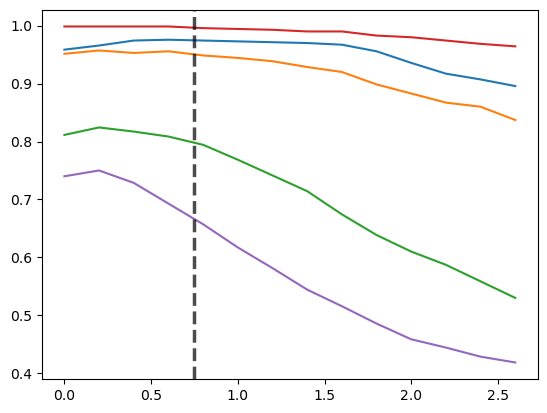

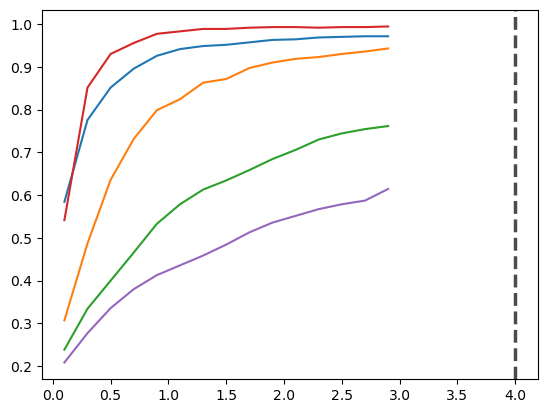

In [39]:
plt.plot(DeltaMax_BA, pcoex_BA_D, label="Barabasi-Albert")
plt.plot(DeltaMax_ER02, pcoex_ER02_D, label="Erdos-Renyi p=0.2")
plt.plot(DeltaMax_ER05, pcoex_ER05_D, label="Erdos-Renyi p=0.5")
plt.plot(DeltaMax_SW, pcoex_SW_D, label="Small World")    
plt.plot(DeltaMax_MF, pcoex_MF_D, label="Mean Field")
plt.axvline(x = gammaDelta_c, color = 'black', lw = 2.5, ls = '--', alpha = 0.7)
plt.show()

plt.plot(vsq_BA, pcoex_BA_vsq, label="Barabasi-Albert")
plt.plot(vsq_ER02, pcoex_ER02_vsq, label="Erdos-Renyi p=0.2")
plt.plot(vsq_ER05, pcoex_ER05_vsq, label="Erdos-Renyi p=0.5")
plt.plot(vsq_SW, pcoex_SW_vsq, label="Small World")
plt.plot(vsq_MF, pcoex_MF_vsq, label="Mean Field")
plt.axvline(x = vc_nets, color = 'black', lw = 2.5, ls = '--', alpha = 0.7)
plt.show()